In [1]:
### Cell 1
# Importing packages needed
import numpy as np
import matplotlib.pyplot as plt

In [2]:
### Cell 2
# Defining our sequence
def fib(x1, x2):
    '''calculates the next term in our sequence given two ordered numbers (Fibonacci Mod 10)'''
    return (x1+x2)%10

In [3]:
### Cell 3
# A function that determines whether the chain 'terminates' or not given a number of trials. It also gives
# the length of the chain and the chain itself
def chain_len(start1, start2, trials):
    '''Parameters: start1 and start2 are the first and second initial numbers in the chain.
    Trials is the number of iterations of the sequence we want.
    
    Returns: 'Terminated' if chain repeats 'Failed to Terminate' if it didn't repeat in the specified number of trials.
    Returns: The length of the chain up to repetition
    Returns: The chain itself in the form of a list
    '''
    chain = [start1, start2]
    end = False
    for i in range(0, trials):
        chain.append(fib(chain[i], chain[i+1]))
        if (chain[i+1]==start1) & (chain[i+2]==start2):
            end=True
            break
            
        else:
            pass
    if end == True:
        Ans = 'Terminated'
    else:
        Ans = 'Failed to Terminate'
    return Ans, len(chain)-2, chain[:-2]

In [4]:
### Cell 4
# Testing the function works as intended
print(chain_len(5,2, 100))

('Terminated', 60, [5, 2, 7, 9, 6, 5, 1, 6, 7, 3, 0, 3, 3, 6, 9, 5, 4, 9, 3, 2, 5, 7, 2, 9, 1, 0, 1, 1, 2, 3, 5, 8, 3, 1, 4, 5, 9, 4, 3, 7, 0, 7, 7, 4, 1, 5, 6, 1, 7, 8, 5, 3, 8, 1, 9, 0, 9, 9, 8, 7])


In [5]:
### Cell 5
## Determining whether each chain terminates
Term = True
# Iterating through every possible starting pair
for i in range(0, 10):
    for j in range(0,10):
        # checking if chain terminated
        if chain_len(i,j,200)[1] == 'Failed to Terminate':
            Term = False
        else:
            pass
print("The statement:'all chains terminate' is", Term)

The statement:'all chains terminate' is True


In [6]:
### Cell 6
## Finding out how many chains there are of each length
# Making an array of all the different lengths
lengths = []
for i in range(0,10):
    for j in range(0,10):
        lengths.append(chain_len(i, j, 200)[1])
        
lengths = np.array(lengths)

# Finding the size of the array
num = len(lengths)
print("The number of entries in our array of lengths =",num)

# finding the different lengths we have
distinct_len = []
for i in range(0, num):
    if lengths[i] not in distinct_len:
        distinct_len.append(lengths[i])
    else:
        pass
distinct_len.sort()
print("The different lengths the chains can be are ",distinct_len)

# finding the number of chains of each length
my_bins = [1,1.5,3.5,4.5,12.5,20.5,60.5]
hist, bin_edges = np.histogram(lengths, bins=my_bins)
print("The number of chains of each length is",hist)

The number of entries in our array of lengths = 100
The different lengths the chains can be are  [1, 3, 4, 12, 20, 60]
The number of chains of each length is [ 1  3  4 12 20 60]


In [7]:
### Cell 7
### Now finding the number of different bracelets

## Creating store of bracelets of same length
l_60 = []
l_20 = []
l_12 = []
l_4 = []
l_3 = []
l_1 = []
for i in range(0,10):
    for j in range(0,10):
        if chain_len(i,j,100)[1] == 60:
            l_60.append(chain_len(i,j,100)[2])
        if chain_len(i,j,100)[1] == 20:
            l_20.append(chain_len(i,j,100)[2])
        if chain_len(i,j,100)[1] == 12:
            l_12.append(chain_len(i,j,100)[2])
        if chain_len(i,j,100)[1] == 4:
            l_4.append(chain_len(i,j,100)[2])
        if chain_len(i,j,100)[1] == 3:
            l_3.append(chain_len(i,j,100)[2])
        if chain_len(i,j,100)[1] == 1:
            l_1.append(chain_len(i,j,100)[2])
            
## Bracelet comparing function
def brac_compare(chain1, chain2, l):
    '''Parameters: chain1 and chain2 are two chains that we want to compare when viewed as bracelets. They are arrays.
    l is the length of the two chains.
    
        Returns: a boolean variable same. Returns True if the chains are the same when viewed as bracelets, False if not '''
    same=False
    #finding start point of chain1
    start = chain1[0:2]
    new_chain2 = []
    for i in range(0,l-1):
        #finding if the start point of chain1 occurs in chain2 and then adjusting chain2 to begin with that start point 
        if (chain2[i]==start[0]) & (chain2[i+1]==start[1]):
            new_chain2 = chain2[i:]+chain2[:i]
        if (chain2[l-1]==start[0]) & (chain2[0]==start[1]):
            new_chain2 = chain2[l-1:]+chain2[:l-1]
        else:
            pass
    #comparing bracelets
    if chain1 == new_chain2:
        same = True
    else:
        pass
    return same
        
## Testing
# test 1
my_bool1 = brac_compare(chain_len(0,1,100)[2],chain_len(3,5,100)[2],60)
print("The statement 'The bracelets started by the pairs (0,1) and (3,5) are the same' is:", my_bool1)

#test 2
brac1 = l_20[3]
brac2 = l_20[14]
print('Starting pair of 4th entry in my store of bracelets of length 20 = ',brac1[:2])
print('Starting pair of 15th entry in my store of bracelets of length 20 = ',brac2[:2])
my_bool2 = brac_compare(chain_len(brac1[0],brac1[1],100)[2],chain_len(brac2[0],brac2[1],100)[2],20)
print("The statement 'The bracelets started by the pairs (0,8) and (6,4) are the same' is:", my_bool2)

The statement 'The bracelets started by the pairs (0,1) and (3,5) are the same' is: True
Starting pair of 4th entry in my store of bracelets of length 20 =  [0, 8]
Starting pair of 15th entry in my store of bracelets of length 20 =  [6, 4]
The statement 'The bracelets started by the pairs (0,8) and (6,4) are the same' is: True


In [8]:
### Cell 8
## Comparing Bracelets of same length
    
def brac_classify(lst):
    '''Accepts a list of chains lst and checks whether all the chains in the list are the same as bracelets.
    If it returns true then all the bracelets are the same. If it returns false all the bracelets are not the same.'''
    # fixing a bracelet
    my_chain = lst[0]
    indicator = True
    # comparing against all bracelets of that length
    for chain in lst[1:]:
        if brac_compare(my_chain, chain, len(lst))==True:
            pass
        else:
            indicator = False
    
    return indicator

#Testing each class of chain
print("The statement 'All bracelets of length 60 are the same' is:",brac_classify(l_60))
print("The statement 'All bracelets of length 20 are the same' is:",brac_classify(l_20))
print("The statement 'All bracelets of length 12 are the same' is:",brac_classify(l_12))
print("The statement 'All bracelets of length 4 are the same' is:",brac_classify(l_4))
print("The statement 'All bracelets of length 3 are the same' is:",brac_classify(l_3))
print("The statement 'All bracelets of length 1 are the same' is:",brac_classify(l_1))

The statement 'All bracelets of length 60 are the same' is: True
The statement 'All bracelets of length 20 are the same' is: True
The statement 'All bracelets of length 12 are the same' is: True
The statement 'All bracelets of length 4 are the same' is: True
The statement 'All bracelets of length 3 are the same' is: True
The statement 'All bracelets of length 1 are the same' is: True


In [9]:
### Cell 9
## Building a function that determines the number of bracelets for every N (context provided in ruberic)

# Sequence calculator for each N
def fib_N(x1, x2, N):
    return (x1+x2)%N

# Function that compares two bracelets to see if they are the same
def new_brac_compare(chain1, chain2):
    '''Parameters: chain1 and chain2 are two chains that we want to compare when viewed as bracelets. They are arrays.
    
        Returns: a boolean variable same. Returns True if the chains are the same when viewed as bracelets, False if not '''
    
    same=False
    #checking length of chains
    if len(chain1)!= len(chain2):
        pass
    else:
        l = len(chain1)
        #finding start point of chain1
        start = chain1[0:2]
        new_chain2 = []
        for i in range(0,l-1):
            #finding if the start point of chain1 occurs in chain2 and then adjusting chain2 to begin with that start point 
            if (chain2[i]==start[0]) & (chain2[i+1]==start[1]):
                new_chain2 = chain2[i:]+chain2[:i]
            if (chain2[l-1]==start[0]) & (chain2[0]==start[1]):
                new_chain2 = chain2[l-1:]+chain2[:l-1]
            else:
                pass
        #comparing bracelets
        if chain1 == new_chain2:
            same = True
        else:
            pass
    return same


# Function that calculates the number of distinct bracelets when working in modulo N
def bracelet_calc(N):
    #Making store of all chains
    chain_store = []
    for i in range(0,N):
        for j in range(0,N):
            chain = chain_len(i,j,N**2+1)[2]
            chain_store.append(chain)
    count = 0
    indexes = list(np.arange(0,len(chain_store),1))
    #finding the number of distinct bracelets
    while len(indexes) != 0:
        i = min(indexes)
        r_indexes = []
        indexes.remove(i)
        for j in indexes:
            if new_brac_compare(chain_store[i], chain_store[j]) == True:
                r_indexes.append(j)
            else:
                pass
        for k in r_indexes:
            indexes.remove(k)
        count += 1
        i += 1
    return count


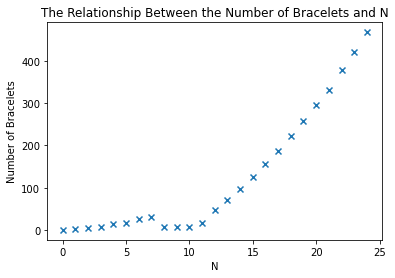

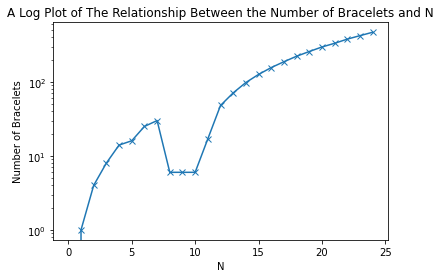

In [10]:
### Cell 10

## Plotting a graph showing relationship between number of bracelets and N for 0<N<
max_N = 25
x = np.arange(0,max_N,1)
y = np.zeros((max_N))
for N in x:
    y[N] = bracelet_calc(N)

# scatter plot
plt.scatter(x,y,marker='x')
plt.xlabel('N')
plt.ylabel('Number of Bracelets')
plt.title('The Relationship Between the Number of Bracelets and N')
plt.show()

# log plot on y axis
plt.semilogy(x,y,marker='x')
plt.xlabel('N')
plt.ylabel('Number of Bracelets')
plt.title('A Log Plot of The Relationship Between the Number of Bracelets and N')
plt.show()